In [447]:
#Importing Libraries
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

In [448]:
df = pd.read_csv(r"C:\Users\arasto6\Desktop\TEXT MINING\Hotel_Reviews.csv")

In [449]:
#conda install -c conda-forge/label/gcc7 missingno

<AxesSubplot:>

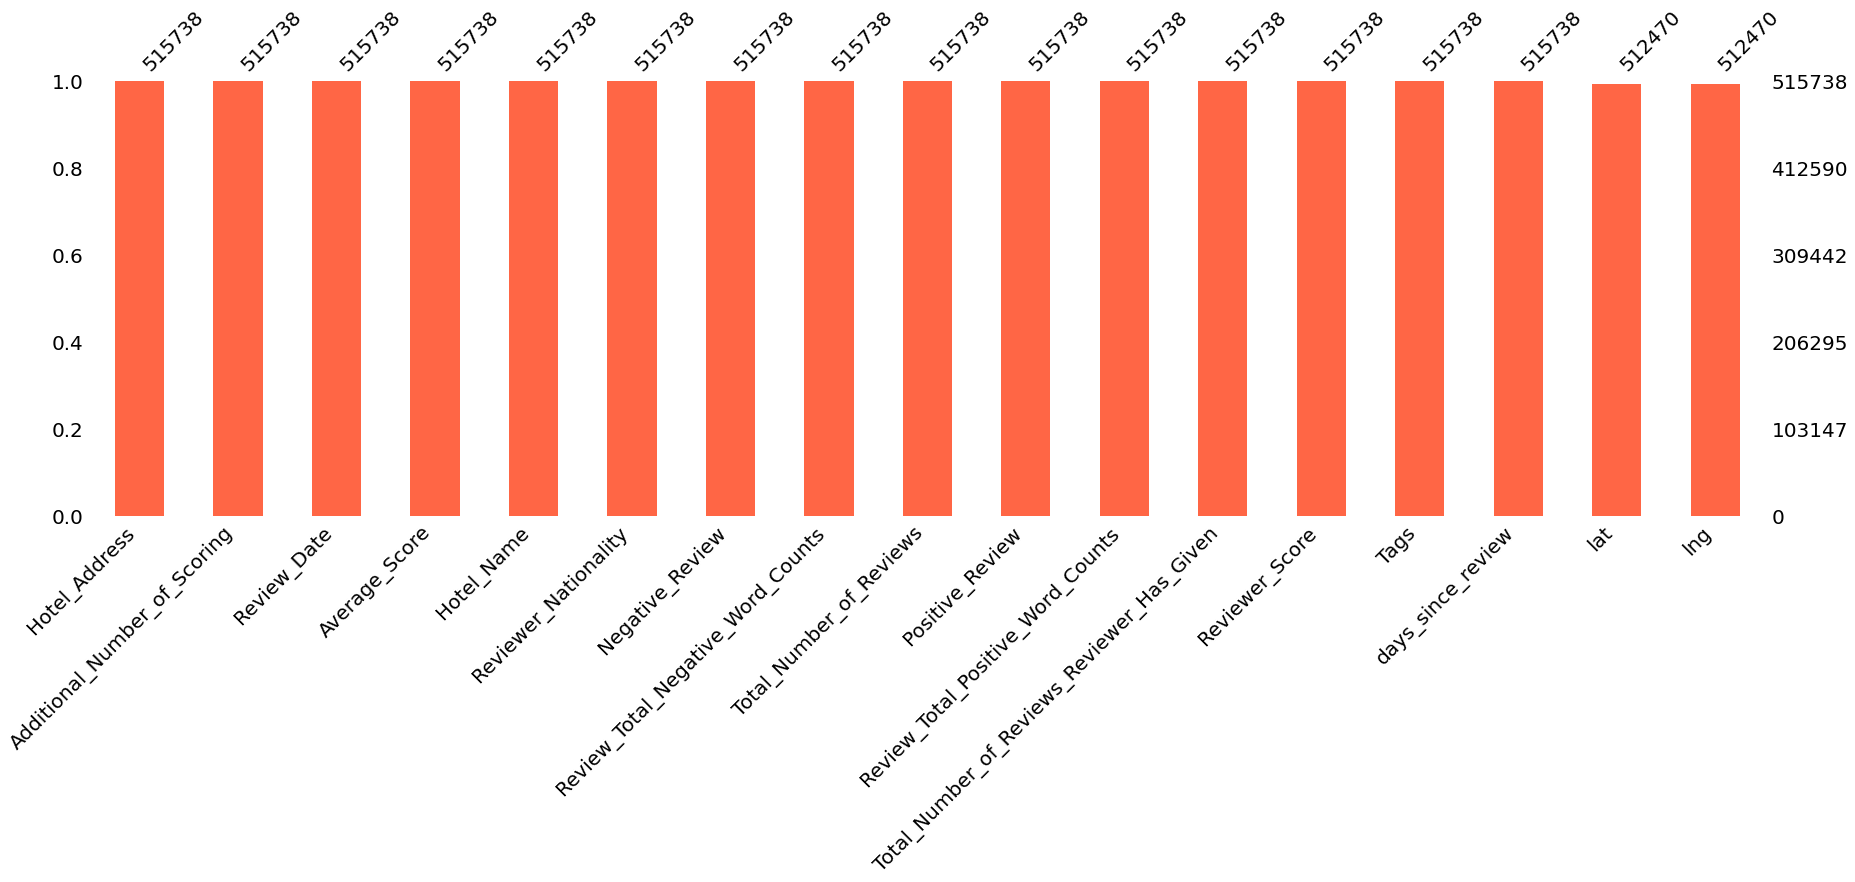

In [450]:
#Missing Numbers

import missingno as msno
msno.bar(df,sort=True,figsize=(30,8),color=(1, 0.40, 0.27),fontsize=20,labels=True)

In [451]:
#Removing NA value
df1 = df.dropna()
df1 = df1.reset_index(drop=True)

In [452]:
#NLP for Negative Reviews
neg_comment = []

for cmnt in df1['Negative_Review']:
    just_letters = re.sub("[^a-zA-Z]", " ",cmnt)
    word_tokens = nltk.word_tokenize(just_letters)
    lwr_case = [l.lower() for l in word_tokens]
    filter_result = list(filter(lambda l: l not in stop_words, lwr_case))
    lemma = [wordnet_lemmatizer.lemmatize(t) for t in filter_result] 
    neg_comment.append(' '.join(lemma))

In [453]:
#NLP for Positive Reviews
pos_comment = []

for cmnt in df1['Positive_Review']:
    just_letters2 = re.sub("[^a-zA-Z]", " ",cmnt)
    word_tokens2 = nltk.word_tokenize(just_letters2)
    lwr_case2 = [l.lower() for l in word_tokens2]
    filter_result2 = list(filter(lambda l: l not in stop_words, lwr_case2))
    lemma2 = [wordnet_lemmatizer.lemmatize(t) for t in filter_result2] 
    pos_comment.append(' '.join(lemma2))

In [454]:
#important words in Negative Reviews
count_vect = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
imp_negativewords = count_vect.fit_transform(neg_comment)
tempN_counts = imp_negativewords.sum(axis=0)
tempN_words = count_vect.vocabulary_

In [455]:
tempN_words

{'booking com': 2,
 'small room': 16,
 'tea coffee': 18,
 'breakfast included': 4,
 'little bit': 9,
 'hotel room': 8,
 'room service': 14,
 'room room': 13,
 'room little': 12,
 'star hotel': 17,
 'mini bar': 10,
 'room small': 15,
 'breakfast expensive': 3,
 'air conditioning': 0,
 'double room': 7,
 'double bed': 6,
 'bit small': 1,
 'room bit': 11,
 'wi fi': 19,
 'breakfast room': 5}

In [456]:
#by analyzing above words some of them are occuring frequently so making a seperate column 

In [457]:
#room_small
small_room = np.zeros(len(df1))
for i in range(len(df1)):
    if ("room small" in neg_comment[i]) or ("small room" in neg_comment[i]):
        small_room[i] = 1
np.sum(small_room)

21862.0

In [458]:
#wi-fi
wifi = np.zeros(len(df1))
for i in range(len(df1)):
    if ("wi fi" in neg_comment[i]):
        wifi[i] = 1
np.sum(wifi)

2278.0

In [459]:
#air-conditioner
A_C = np.zeros(len(df1))
for i in range(len(df1)):
    if ("air conditioning" in neg_comment[i]) or ("air conditioner" in neg_comment[i]) : 
        A_C[i] = 1
np.sum(A_C)

6314.0

In [460]:
#booking 
booking = np.zeros(len(df1))
for i in range(len(df1)):
    if ("booking com" in neg_comment[i]): 
        booking[i] = 1
np.sum(booking)

3890.0

In [461]:
#breakfast
breakfst = np.zeros(len(df1))
for i in range(len(df1)):
    if ("breakfast expensive" in neg_comment[i]) or ("breakfast included" in neg_comment[i]) or ("breakfast room" in neg_comment[i]) or ("tea coffee" in neg_comment[i]): 
        breakfst[i] = 1
np.sum(breakfst)

11356.0

In [462]:
#room_problem
rooms_problem = np.zeros(len(df1))
for i in range(len(df1)):
    if ("mini bar" in neg_comment[i]) or ("room service" in neg_comment[i]) or ("double bed" in neg_comment[i]) or ("double room" in neg_comment[i]): 
        rooms_problem[i] = 1
np.sum(rooms_problem)

13459.0

In [463]:
#important words in Positive Reviews
cvP = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
imp_positivewords = cvP.fit_transform(pos_comment)
tempP_counts = imp_positivewords.sum(axis=0)
tempP_words = cvP.vocabulary_

In [464]:
tempP_words

{'great location': 11,
 'location good': 14,
 'good location': 10,
 'friendly staff': 8,
 'good breakfast': 9,
 'walking distance': 19,
 'comfy bed': 5,
 'comfortable room': 4,
 'staff friendly': 17,
 'friendly helpful': 7,
 'helpful staff': 12,
 'clean room': 2,
 'staff helpful': 18,
 'bed comfortable': 0,
 'room clean': 16,
 'comfortable bed': 3,
 'location great': 15,
 'breakfast good': 1,
 'excellent location': 6,
 'location excellent': 13}

In [465]:
#Location
locationP = np.zeros(len(df1))
for i in range(len(df1)):
    if ("good location" in pos_comment[i]) or ("great location" in pos_comment[i]) or ("location excellent" in pos_comment[i]) or ("location great" in pos_comment[i]) or ("location good" in pos_comment[i]) or ("walking distance" in pos_comment[i]) or ("excellent location" in pos_comment[i]): 
        locationP[i] = 1
np.sum(locationP)

90328.0

In [466]:
#Staff
staffP = np.zeros(len(df1))
for i in range(len(df1)):
    if ("friendly helpful" in pos_comment[i]) or ("friendly staff" in pos_comment[i]) or ("helpful staff" in pos_comment[i]) or ("staff helpful" in pos_comment[i]) or ("staff friendly" in pos_comment[i]): 
        staffP[i] = 1
np.sum(staffP)

87814.0

In [467]:
#bed and room
bed_n_room = np.zeros(len(df1))
for i in range(len(df1)):
    if ("bed comfortable" in pos_comment[i]) or ("clean room" in pos_comment[i]) or ("comfortable bed" in pos_comment[i]) or ("comfortable room" in pos_comment[i]) or ("comfy bed" in pos_comment[i]) or ("room clean" in pos_comment[i]) :
        bed_n_room[i] = 1
np.sum(bed_n_room)

56091.0

In [468]:
#breakfast
for i in range(len(df1)):
    if ("breakfast good" in pos_comment[i]) or ("good breakfast" in pos_comment[i]): 
        breakfst[i] = breakfst[i]+ 1
np.sum(breakfst)

28738.0

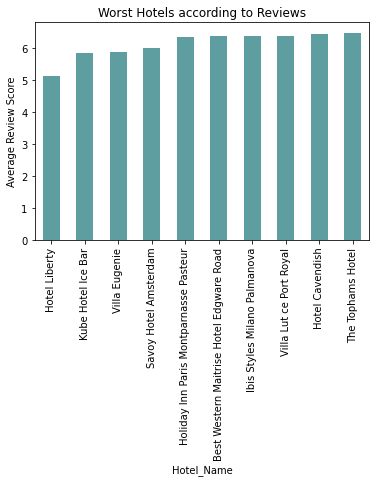

In [469]:
#Worst Hotels
wrst_hotel =df1.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(10)
wrst_hotel.plot(kind="bar",color="cadetblue")
_=plt.xlabel('Hotel_Name')
_=plt.ylabel('Average Review Score')
_=plt.title('Worst Hotels according to Reviews')
plt.show()

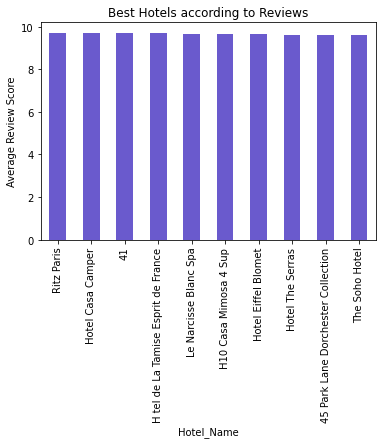

In [470]:
#Best Hotels
bst_hotel = df1.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(10)
bst_hotel.plot(kind="bar",color = "slateblue")
_=plt.xlabel('Hotel_Name')
_=plt.ylabel('Average Review Score')
_=plt.title('Best Hotels according to Reviews')
plt.show()

In [471]:
#Countries are extrated from below github link
# https://gist.github.com/Desperado/3293395#file-countryinfo-py
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/New Delhi'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
]

In [472]:
df1['Reviewer_Nationality'].value_counts().sort_values(ascending=False).head(20)

 United Kingdom               244457
 United States of America      35196
 Australia                     21540
 Ireland                       14746
 United Arab Emirates          10176
 Saudi Arabia                   8914
 Netherlands                    8706
 Switzerland                    8616
 Germany                        7843
 Canada                         7813
 France                         7233
 Israel                         6536
 Italy                          6061
 Belgium                        5991
 Turkey                         5383
 Kuwait                         4904
 Spain                          4694
 Romania                        4424
 Russia                         3844
 South Africa                   3795
Name: Reviewer_Nationality, dtype: int64

In [473]:
europe_lst = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Europe':
        europe_lst.append(countries[j]['name'])

asia_lst = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Asia':
        asia_lst.append(countries[j]['name'])

northernamerica_lst = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'North America':
        northernamerica_lst.append(countries[j]['name'])

southernamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'South America':
        southernamerica_list.append(countries[j]['name'])
        
oceania_lst = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Oceania':
        oceania_lst.append(countries[j]['name'])

africa_lst = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Africa':
        africa_list.append(countries[j]['name'])

In [474]:
#Changing certain names for the convenience 
northernamerica_lst[17] = 'United States of America'
europe_lst[14] = 'Ireland'        
europe_lst[23] = 'Netherlands'
asia_lst[7] = 'China'

In [561]:
# There are empty chracters in the Reviewer_Nationality
df1['Reviewer_Nationality'] = df1['Reviewer_Nationality'].map(lambda x: x[1:-1])

0                 ussi
1                relan
2              ustrali
3         nited Kingdo
4            ew Zealan
              ...     
512465            uwai
512466           stoni
512467             gyp
512468            exic
512469           ungar
Name: Reviewer_Nationality, Length: 512470, dtype: object

In [476]:
#Adding Continent column
continent = []
for k in range(len(df1)):
    if df1['Reviewer_Nationality'][k] in europe_lst:
        continent.append("Europe")
    elif df1['Reviewer_Nationality'][k] in asia_lst:
        continent.append("Asia")
    elif df1['Reviewer_Nationality'][k] in africa_list:
        continent.append("Africa")
    elif df1['Reviewer_Nationality'][k] in oceania_lst:
        continent.append("Oceania")
    elif df1['Reviewer_Nationality'][k] in northernamerica_lst:
        continent.append("North America")
    elif df1['Reviewer_Nationality'][k] in southernamerica_list:
        continent.append("South America")
    else:
        continent.append("Other")

continent = pd.Series(continent)
df1['continent'] = continent

In [477]:
#Day_Passed
import re

df1['Day_Passed'] = df1['days_since_review'].map(lambda x: re.findall(r'\d+',x))
df1['Day_Passed'] = df1['Day_Passed'].map(lambda x: x[0])
del df1['days_since_review']
df1['Day_Passed'] = df1['Day_Passed'].astype(int)

In [538]:
#Mining some important information from tags
df1['Leisure'] = df1['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df1['Business'] = df1['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df1['Trip'] = df1['Leisure'] + df1['Business']

In [539]:
#Roughly 15000 trips are not part of leisure or business, so assigning them into numbers with probabilities
#Therefore, assigning 80% to leisure and 20% to business

In [540]:
import random
df1['Trip'] = df1[df1['Trip'] == 0]['Trip'].map(lambda x: 1 if random.random() > 0.2 else 2)
df1['Trip'] = df1['Trip'].fillna(0)
df1['Trip'] = df1['Trip'] + df1['Business'] + df1['Leisure']
del df1['Leisure'] , df1['Business']

In [541]:
df1['Trip'].value_counts()

1.0    427052
2.0     85418
Name: Trip, dtype: int64

In [483]:
#assigning values to Couple, Solo, Group,Family_with_older children, Family with younger Children from tag column
#and joining them in "whom" column

df1['Solo'] = df1['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
df1['Couple'] = df1['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
df1['Group'] = df1['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
df1['Family_with_young_children'] = df1['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
df1['Family_with_older_children'] = df1['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
df1['whom'] = df1['Solo'] + df1['Couple'] + df1['Group'] + df1['Family_with_young_children'] + df1['Family_with_older_children']
del df1['Solo'], df1['Couple'],df1['Group'], df1['Family_with_young_children'],df1['Family_with_older_children']

In [484]:
df1.whom.value_counts()

2    250756
1    107844
3     64944
4     60603
5     26196
0      2127
Name: whom, dtype: int64

In [485]:
#assigning 0 valued feature to 2 as it has the most counts

df1['whom'] = df1['whom'].map(lambda x: 2 if x == 0 else x)
df1.whom.value_counts()

2    252883
1    107844
3     64944
4     60603
5     26196
Name: whom, dtype: int64

In [487]:
#Stayings
df1['Stayed_1_days'] = df1['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
df1['Stayed_2_days'] = df1['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
df1['Stayed_3_days'] = df1['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
df1['Stayed_4_days'] = df1['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
df1['Stayed_5_days'] = df1['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
df1['Stayed_6_days'] = df1['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
df1['Stayed_7_days'] = df1['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
df1['Stayed_8_days'] = df1['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
df1['Stayed_9_days'] = df1['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
df1['Stayed_10_days'] = df1['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
df1['Stayed_11_days'] = df1['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
df1['Stayed_12_days'] = df1['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
df1['Stayed_13_days'] = df1['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
df1['Stayed_14_days'] = df1['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
df1['Stayed_15_days'] = df1['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
df1['Stayed_16_days'] = df1['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
df1['Stayed_17_days'] = df1['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
df1['Stayed_18_days'] = df1['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
df1['Stayed_19_days'] = df1['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
df1['Stayed_20_days'] = df1['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)

In [488]:
temp_list = []
for j in range(20,40):
    sum = np.sum(df1.iloc[:,j])/(j-19)
    temp_list.append(sum)
staying = np.array(temp_list,dtype=int)
np.sum(staying)

512186

In [489]:
#512470 - 512186 = 284 reviews whose stayings for more than 20 days.
# assigning all of them as 21 days

In [490]:
df1['stayed_time'] = df1['Stayed_1_days'] + df1['Stayed_2_days'] + df1['Stayed_3_days'] + df1['Stayed_4_days'] + df1['Stayed_5_days'] + df1['Stayed_6_days'] + df1['Stayed_7_days'] + df1['Stayed_8_days'] + df1['Stayed_9_days'] + df1['Stayed_10_days'] + df1['Stayed_11_days'] + df1['Stayed_12_days'] + df1['Stayed_13_days'] + df1['Stayed_14_days'] + df1['Stayed_15_days'] + df1['Stayed_16_days'] + df1['Stayed_17_days'] + df1['Stayed_18_days'] + df1['Stayed_19_days'] + df1['Stayed_20_days']
del df1['Stayed_1_days'] , df1['Stayed_2_days'] , df1['Stayed_3_days'] , df1['Stayed_4_days'], df1['Stayed_5_days'] , df1['Stayed_6_days'] , df1['Stayed_7_days'] , df1['Stayed_8_days'] , df1['Stayed_9_days'] , df1['Stayed_10_days'] , df1['Stayed_11_days'] , df1['Stayed_12_days'] , df1['Stayed_13_days'] , df1['Stayed_14_days'] , df1['Stayed_15_days'] , df1['Stayed_16_days'] , df1['Stayed_17_days'] , df1['Stayed_18_days'] , df1['Stayed_19_days'] , df1['Stayed_20_days']

In [491]:
df1.shape

(512470, 21)

In [492]:
df1.stayed_time.value_counts()
#Assgining stayings which are over 20 days as 21
df1['stayed_time'] = df1['stayed_time'].map(lambda x: 21 if x == 0 else x)

In [493]:
len(df1[df1['stayed_time'] == 0])

0

In [494]:
#Adding the extracted columns

df1['small_room'] = small_room
df1['wifi'] = wifi
df1['A_C'] = A_C
df1['breakfst'] = breakfst
df1['booking'] = booking
df1['rooms_problem'] = rooms_problem
df1['locationP'] = locationP
df1['staffP'] = staffP
df1['bed_n_room'] = bed_n_room

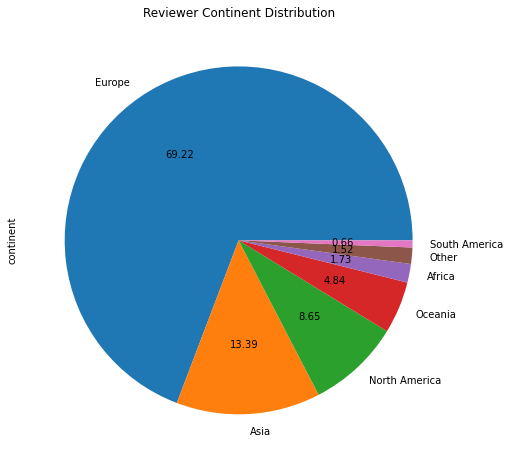

In [553]:
#Reviewer based Continent Distribution
plt.figure(figsize=(12,8))
df1.continent.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Reviewer Continent Distribution')
plt.show()

In [496]:
#From above we can see most of the reviewer are from Europe followed by Asia

In [507]:
#Extracting year and month information
year = df1['Review_Date'].map(lambda x: x.split('/')[2])
month = df1['Review_Date'].map(lambda x: x.split('/')[0])
df1['month'] = month
df1['year'] = year
del df1['Review_Date']

In [546]:
#Hotel Country
Country = df1['Hotel_Address'].map(lambda x: x.split()[-1])
Country = country.map(lambda x: 'United Kingdom' if x == 'Kingdom' else x)
df1['Country'] = Country

In [509]:
#Most satisfied people with respect to continents
df1.groupby('continent')['Reviewer_Score'].mean().sort_values(ascending=False).head(7)

continent
North America    8.739470
Oceania          8.598920
South America    8.435867
Europe           8.408083
Other            8.210257
Africa           8.205784
Asia             8.078886
Name: Reviewer_Score, dtype: float64

In [510]:
#North Americans are most statisfied

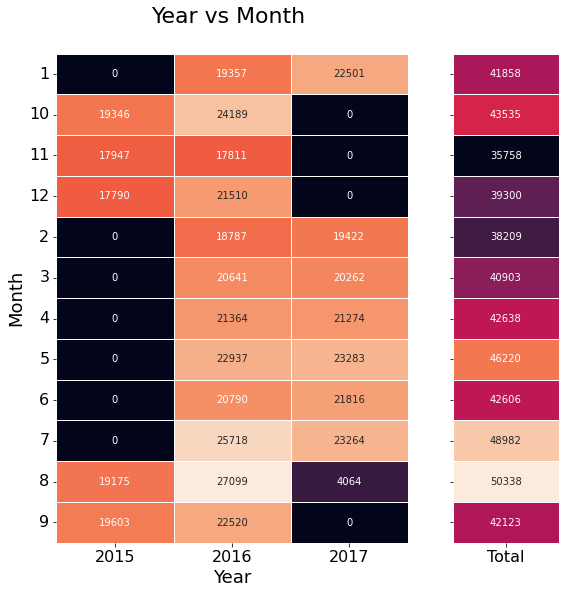

In [511]:
#Year vs Month
##Target_type vs Year
a=df1.groupby(['year','month']).size()
a
b=a.unstack(level=0)
e=b.replace(np.nan,0)
e=e.astype(int)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(9, 9)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1.5]) 
ax0 = plt.subplot(gs[0])
sns.heatmap(e,annot=True,fmt='d',linewidths=.5,ax=ax0, cbar=False,annot_kws={"size":10})
ax1 = plt.subplot(gs[1],sharey=ax0)
sns.heatmap(pd.DataFrame(e.sum(axis=1)),annot=True,fmt='d',linewidths=.5,ax=ax1,cbar=False,annot_kws={"size":10})
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.set_ylabel([]),visible=False)
plt.setp(ax0.yaxis.get_majorticklabels(),rotation=0)
ax0.tick_params(axis='y',labelsize=16)
ax0.tick_params(axis='x',labelsize=16)
ax0.set_ylabel("Month",size=18)
ax0.set_xlabel("Year",size=18)
ax1.set_xticklabels(["Total"],size=16)
ax0.set_title("Year vs Month ",size=22,y=1.05,x=0.5)

plt.show()

Text(0.5, 1.0, 'Booking.com')

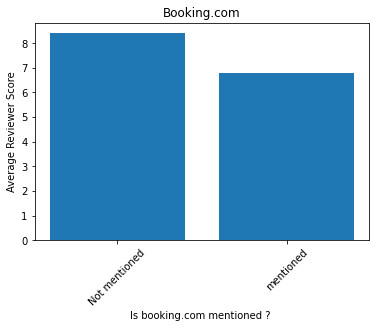

In [512]:
#Booking.com
booking_avg=df1.groupby('booking')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,booking_avg)
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Is booking.com mentioned ? ')
plt.title('Booking.com')

In [513]:
#If a user mentions about booking.com his/her review is probably more low

Text(0.5, 1.0, 'Wifi')

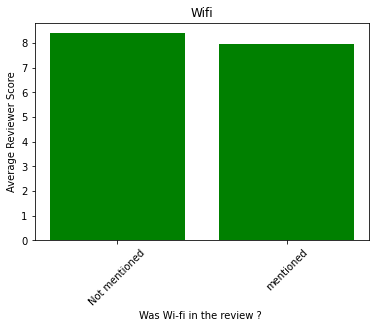

In [514]:
#Wi-fi
wifi_avg=df1.groupby('wifi')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,wifi_avg,color='green')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was Wi-fi in the review ? ')
plt.title('Wifi')


Text(0.5, 1.0, 'Breakfast')

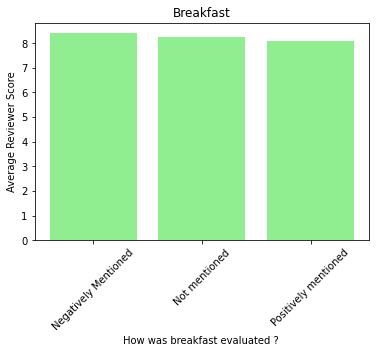

In [549]:
# wifi might be important

##Breakfast
bf_avg=df1.groupby('breakfst')['Reviewer_Score'].mean()
Indexb = [-1,0,1]
plt.bar(Indexb,bf_avg,color='lightgreen')
plt.xticks(Indexb,['Negatively Mentioned','Not mentioned','Positively mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('How was breakfast evaluated ? ')
plt.title('Breakfast')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21')])

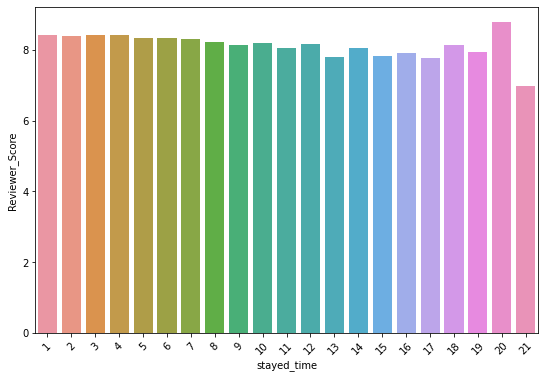

In [551]:
## Stayed_days
stayed_time_hist=df1.groupby("stayed_time")['Reviewer_Score'].mean().reset_index().sort_values(by='stayed_time',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='stayed_time',y='Reviewer_Score', data=stayed_time_hist)
plt.xticks(rotation=45)

In [518]:
#According to General trend , the more the staying , the less the reviewer_score .

(array([0, 1, 2]),
 [Text(0, 0, '2017'), Text(1, 0, '2016'), Text(2, 0, '2015')])

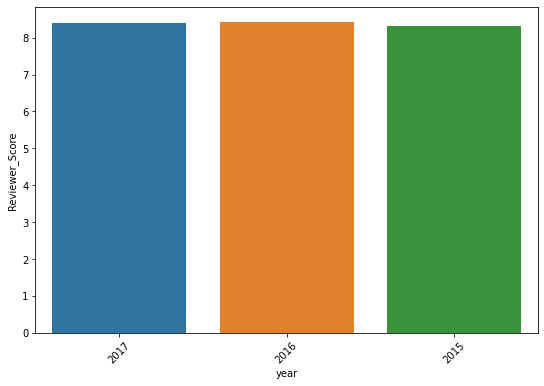

In [519]:
#Year
year_hist=df1.groupby("year")['Reviewer_Score'].mean().reset_index().sort_values(by='year',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='year',y='Reviewer_Score', data=year_hist)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

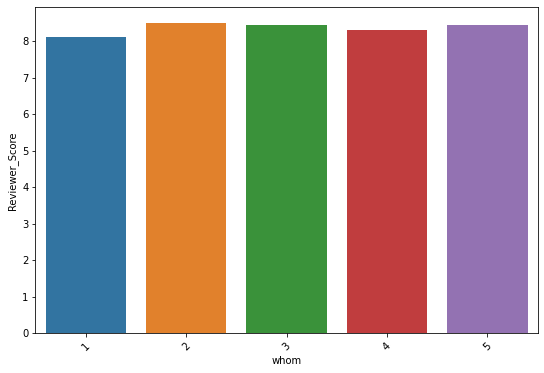

In [522]:
#Whom
whom_hist=df1.groupby("whom")['Reviewer_Score'].mean().reset_index().sort_values(by='whom',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='whom',y='Reviewer_Score', data=whom_hist)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Small Room')

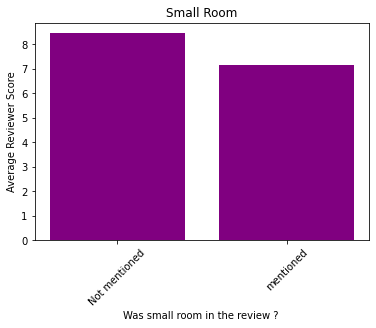

In [526]:
##Small Room
sr_avg=df1.groupby('small_room')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,sr_avg,color='purple')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was small room in the review ? ')
plt.title('Small Room')


In [527]:
#This attribute is significant for reviewers

Text(0.5, 1.0, 'Air Conditioning')

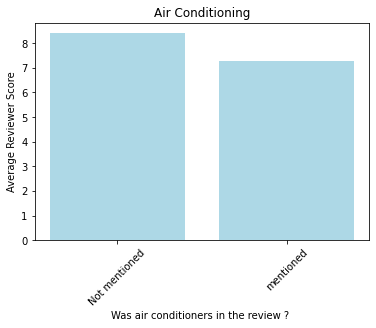

In [528]:
##Air_conditioners
ac_average=df1.groupby('A_C')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,ac_average,color='lightblue')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was air conditioners in the review ? ')
plt.title('Air Conditioning')

In [529]:
#air_conditioning is an important variable.

Text(0.5, 1.0, 'Room Problem')

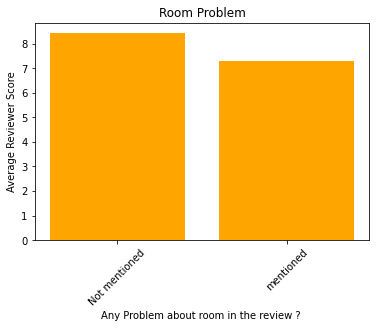

In [530]:
#room_problem
rp_average=df1.groupby('rooms_problem')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,rp_average,color='orange')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Any Problem about room in the review ? ')
plt.title('Room Problem')

In [257]:
#room problem is significant

Text(0.5, 1.0, 'Location')

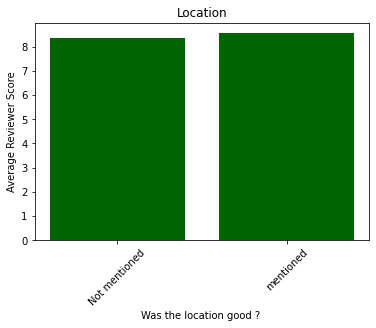

In [563]:
#location
lc_average=df1.groupby('locationP')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,lc_average,color='darkgreen')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the location good ? ')
plt.title('Location')


Text(0.5, 1.0, 'Staff')

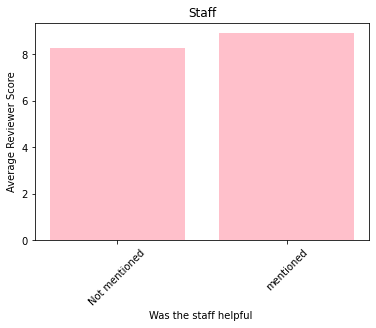

In [534]:
##Staff
st_average=df1.groupby('staffP')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,st_average,color='pink')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the staff helpful ')
plt.title('Staff')

In [261]:
#Staff is an important parameter

Text(0.5, 1.0, 'Bed and Room')

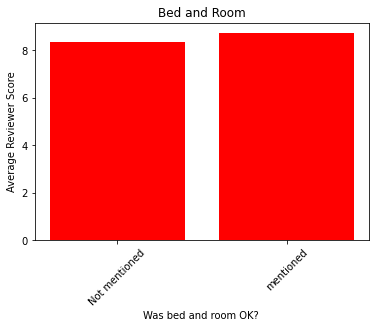

In [536]:
##Bed_and_Room
br_average=df1.groupby('bed_n_room')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,br_average,color='red')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was bed and room OK? ')
plt.title('Bed and Room')

Text(0.5, 1.0, 'Trip Type')

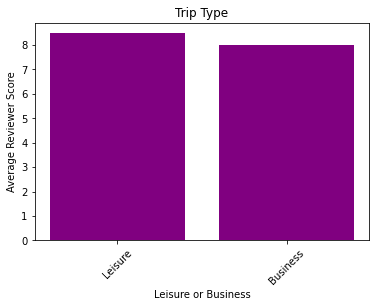

In [560]:
##Trip Type
tt_average=df1.groupby('Trip')['Reviewer_Score'].mean()
Index = [1,2]
plt.bar(Index,tt_average,color='purple')
plt.xticks(Index,['Leisure','Business'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Leisure or Business')
plt.title('Trip Type')

In [543]:
#business type trips are lower than leisure

Text(0.5, 1.0, 'Best Hotels in Europe')

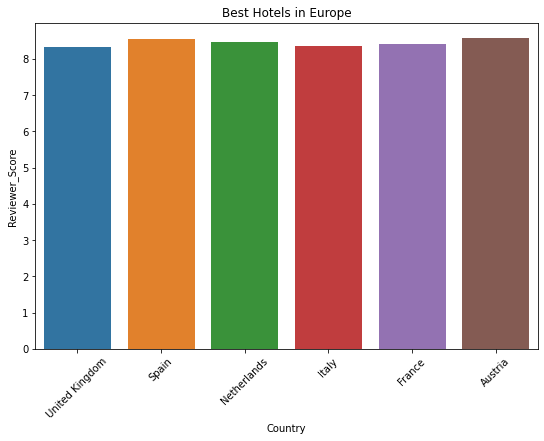

In [555]:
#THE HOTELS OF COUNTRIES
the_hotels_of_countries_hist=df1.groupby("Country")['Reviewer_Score'].mean().reset_index().sort_values(by='Country',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='Country',y='Reviewer_Score', data=the_hotels_of_countries_hist)
plt.xticks(rotation=45)
plt.title('Best Hotels in Europe')

In [267]:
#Austria's hotels have higher reviewer scrore